### Task 1 
Implement the OR Boolean logic gate using perceptron Neural Network. Inputs = x1, x2 and 
bias, weights should be fed into the perceptron with single Output = y. Display final weights 
and bias of each perceptron.

In [80]:
import numpy as np
import tensorflow as tf

In [51]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 1])
w1 = 1
w2 = 1
b = 0

In [52]:
def step(z):
    return 1 if z>=1 else 0

In [53]:
for i in range(X.shape[0]):
    z = w1*X[i][0] + w2*X[i][1] + b
    print(f"Input: {X[i]} → Output:", step(z))

Input: [0 0] → Output: 0
Input: [0 1] → Output: 1
Input: [1 0] → Output: 1
Input: [1 1] → Output: 1


#### Using the updating weights and bias approach:

In [54]:
w = np.random.rand(2)
b = np.random.rand(1)

epochs = 5
learning_rate = 0.1

for epoch in range(epochs):
    for i in range(X.shape[0]):
        z = np.dot(w, X[i]) + b
        y_pred = step(z)
        error = y[i] - y_pred
        w += learning_rate * error * X[i]
        b += learning_rate * error

print("Trained weights:", w)
print("Trained bias:", b)


Trained weights: [0.46398638 0.64831232]
Trained bias: [0.56438044]


In [55]:
print("\nPredictions:")
for i in range(len(X)):
    z = np.dot(w, X[i]) + b
    print(f"Input: {X[i]} → Output:", step(z))


Predictions:
Input: [0 0] → Output: 0
Input: [0 1] → Output: 1
Input: [1 0] → Output: 1
Input: [1 1] → Output: 1


### Task 2 
- Use the iris dataset Encode the input and show the new representation 
- Decode the lossy representation for the output  
- Map the input to reconstruction and visualize 

In [56]:
from sklearn.datasets import load_iris

In [57]:
iris =load_iris()

In [58]:
data = iris.data

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [61]:
autoencoder = Sequential([
    Input(shape = (4,)),
    Dense(2, activation='relu'),
    Dense(4, activation='sigmoid')
])

In [62]:
autoencoder.compile(optimizer='adam', loss='mse')

In [63]:
autoencoder.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

In [64]:
autoencoder.fit(data, data, epochs=50, batch_size=8, shuffle=True)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9844  
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9777 
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9709 
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9649 
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9589 
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9533 
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9480 
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9428 
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9379 
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9328 
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9281 
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9233 
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9185 
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9135 
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9086 
Epo

In [66]:
encoder = Sequential([
    autoencoder.layers[0]
])

encoded_data = encoder.predict(data)

print("Encoded (Lossy) Representation - First 5 Samples:\n")
print(encoded_data[:5])


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Encoded (Lossy) Representation - First 5 Samples:

[[5.126318  0.       ]
 [5.3782887 0.       ]
 [5.74848   0.       ]
 [5.7439027 0.       ]
 [5.2762113 0.       ]]


In [67]:
decoded_data = autoencoder.predict(data)

# Convert back to original scale
decoded_original = scaler.inverse_transform(decoded_data)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


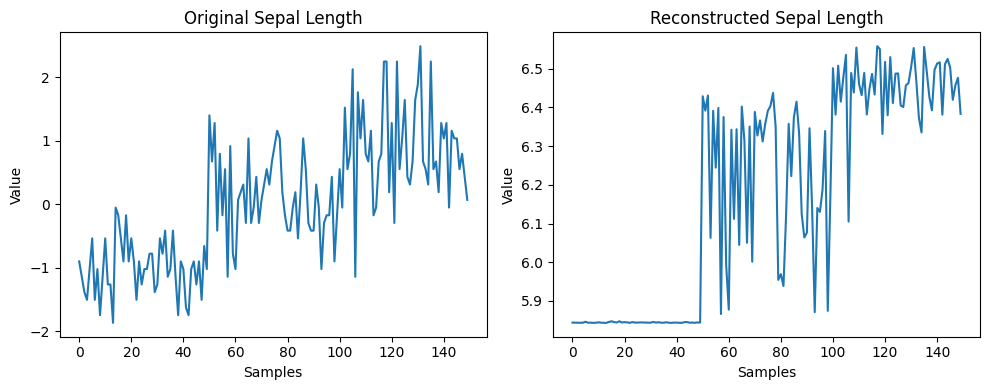

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

# Original Sepal Length
plt.subplot(1,2,1)
plt.title("Original Sepal Length")
plt.plot(data[:, 0])
plt.xlabel("Samples")
plt.ylabel("Value")

# Reconstructed Sepal Length
plt.subplot(1,2,2)
plt.title("Reconstructed Sepal Length")
plt.plot(decoded_original[:, 0])
plt.xlabel("Samples")
plt.ylabel("Value")

plt.tight_layout()
plt.show()


In [76]:
import numpy as np

def mean_squared_error(original, reconstructed):
    return np.mean((original - reconstructed) ** 2)

In [77]:
for i in range(data.shape[1]):
    mse = mean_squared_error(data[:, i], decoded_data[:, i])
    print(f"MSE for feature {i+1}: {mse}")

MSE for feature 1: 0.6729832965435186
MSE for feature 2: 0.9959780458365102
MSE for feature 3: 0.6365716894583316
MSE for feature 4: 0.6239168277227577
